In [14]:
import pandas as pd

In [15]:
df_notas = pd.read_csv('ratings.csv')
df_notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
df_notas.shape

(100836, 4)

In [17]:
df_notas.columns = "usuarioID", "filmeID", "nota", "momento"

In [18]:
df_notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [19]:
df_notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [20]:
df_notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

<Axes: ylabel='Frequency'>

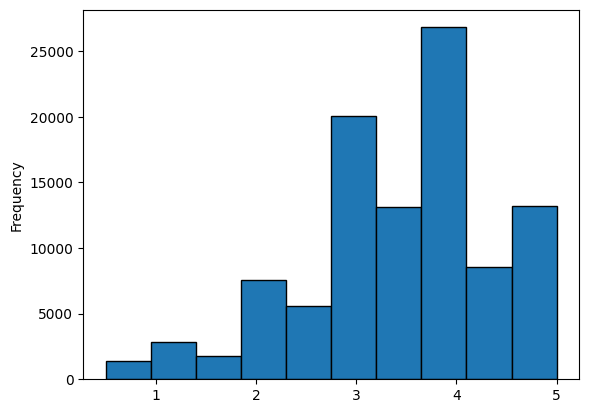

In [21]:
df_notas.nota.plot(kind='hist', edgecolor='black')

In [22]:
print(df_notas.nota.mean())
print(df_notas.nota.median())

3.501556983616962
3.5


In [23]:
df_notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [24]:
import seaborn as sns

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
sns.boxplot(df_notas.nota)

In [ ]:
df_filmes = pd.read_csv('movies.csv')
df_filmes.columns = ["filmeid", "titulo", "genero"]
df_filmes.head()

# Analisando notas por filme

In [ ]:
df_notas.query("filmeID == 1").nota.mean()

In [ ]:
df_notas.query("filmeID == 2").nota.mean()

In [ ]:
medias_por_filme = df_notas.groupby("filmeID").mean() ["nota"]
medias_por_filme.head()

In [ ]:
medias_por_filme.plot(kind='hist')

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 8))

sns.boxplot(medias_por_filme)

In [ ]:
medias_por_filme.describe()

In [ ]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)

In [ ]:
df_filmes.head(2)


In [25]:
# prompt: extraia as notas dos dois filmes em variáveis distintas

filme1_nota = df_notas.query("filmeID==1") ["nota"].mean()
filme2_nota = df_notas.query("filmeID==2")["nota"].mean()


In [27]:
df_notas.head(5).query("filmeID==1")

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703


In [45]:
import numpy as np

In [13]:
#prompt: extraia as notas dos dois filmes em variáveis distintas

# notas_do_toy_story = df_notas.query("filmeID==1") ["nota"]
# notas_do_jumanji = df_notas.query("filmeID=2") ["nota"]
 
# media_do_toy_story = notas_do_toy_story.mean()
# media_do_jumanji = notas_do_jumanji.mean()
 
# print(media_do_toy_story, media_do_jumanji)

ValueError: cannot assign without a target object

In [12]:
print(notas_do_jumanji)

NameError: name 'notas_do_jumanji' is not defined